# Importing packages 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 

from keras import models, layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

from IPython.display import display 
from PIL import Image

Using TensorFlow backend.


# Pretrained network 

In [2]:
conv_base = VGG16(weights='imagenet', 
                 include_top=False,
                 input_shape=(150, 150, 3))

In [3]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


# Preparing data 

In [5]:
file_dir = '/Users/rosha/Python/Kaggle/Cat and Dog/train_dog_and_cat_small'
train_dir = '/'.join([file_dir, 'train'])
validation_dir = '/'.join([file_dir, 'validation'])
test_dir = '/'.join([file_dir, 'test'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(150, 150), 
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                   target_size=(150, 150), 
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training model 

In [7]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=100, 
                             epochs=30, 
                             validation_data=validation_generator, 
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 42s 422ms/step - loss: 0.5219 - acc: 0.7266 - val_loss: 0.3692 - val_acc: 0.8522
Epoch 2/30
100/100 [==============================] - 40s 399ms/step - loss: 0.4085 - acc: 0.8072 - val_loss: 0.2588 - val_acc: 0.8821
Epoch 3/30
100/100 [==============================] - 39s 390ms/step - loss: 0.3744 - acc: 0.8283 - val_loss: 0.1465 - val_acc: 0.8775
Epoch 4/30
100/100 [==============================] - 38s 377ms/step - loss: 0.3439 - acc: 0.8483 - val_loss: 0.1671 - val_acc: 0.8814
Epoch 5/30
100/100 [==============================] - 35s 354ms/step - loss: 0.3203 - acc: 0.8561 - val_loss: 0.5573 - val_acc: 0.8864
Epoch 6/30
100/100 [==============================] - 36s 363ms/step - loss: 0.3006 - acc: 0.8668 - val_loss: 0.2622 - val_acc: 0.9034
Epoch 7/30
100/100 [==============================] - 35s 349ms/step - loss: 0.3089 - acc: 0.8646 - val_loss: 0.1581 - val_acc: 0.9061
Epoch 8/30
100/100 [==============================] - 3

In [8]:
model.save('cats_dogs_run4.h5')

In [9]:
hist_dict = history.history

train_acc = hist_dict['acc']
valdt_acc = hist_dict['val_acc']

train_loss = hist_dict['loss']
valdt_loss = hist_dict['val_loss']

epoches = range(1, 1 + len(train_acc))

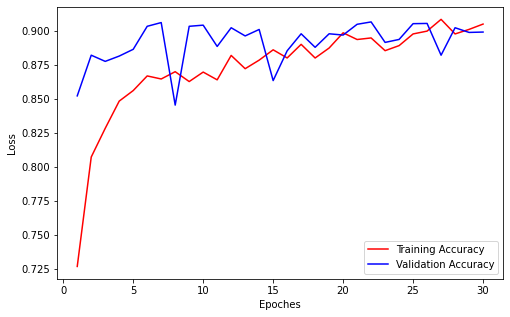

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(epoches, train_acc, 'r')
plt.plot(epoches, valdt_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

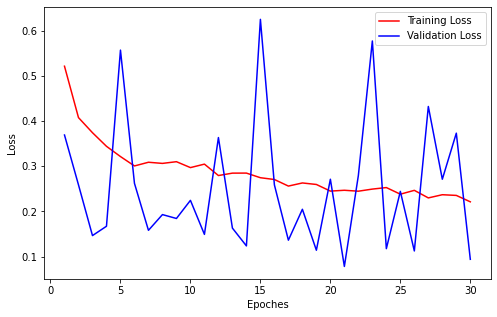

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(epoches, train_loss, 'r')
plt.plot(epoches, valdt_loss, 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

# Fine tuning with pretrained network 

In [12]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    else:
        set_trainable = False
    
model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-5), 
             metrics=['acc'])

In [13]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=100, 
                             epochs=100, 
                             validation_data=validation_generator, 
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 77s 769ms/step - loss: 0.2505 - acc: 0.8986 - val_loss: 0.3117 - val_acc: 0.9289
Epoch 2/100
100/100 [==============================] - 70s 695ms/step - loss: 0.1683 - acc: 0.9274 - val_loss: 0.1338 - val_acc: 0.9510
Epoch 3/100
100/100 [==============================] - 71s 705ms/step - loss: 0.1536 - acc: 0.9410 - val_loss: 0.2163 - val_acc: 0.9410
Epoch 4/100
100/100 [==============================] - 68s 682ms/step - loss: 0.1287 - acc: 0.9476 - val_loss: 0.0299 - val_acc: 0.9414
Epoch 5/100
100/100 [==============================] - 68s 684ms/step - loss: 0.1153 - acc: 0.9532 - val_loss: 0.0622 - val_acc: 0.9562
Epoch 6/100
100/100 [==============================] - 69s 686ms/step - loss: 0.0858 - acc: 0.9710 - val_loss: 0.1099 - val_acc: 0.9504
Epoch 7/100
100/100 [==============================] - 69s 694ms/step - loss: 0.0782 - acc: 0.9686 - val_loss: 0.1269 - val_acc: 0.9365
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 68s 682ms/step - loss: 0.0140 - acc: 0.9959 - val_loss: 0.0457 - val_acc: 0.9704
Epoch 62/100
100/100 [==============================] - 68s 685ms/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0509 - val_acc: 0.9714
Epoch 63/100
100/100 [==============================] - 68s 684ms/step - loss: 0.0062 - acc: 0.9984 - val_loss: 0.0010 - val_acc: 0.9794
Epoch 64/100
100/100 [==============================] - 68s 684ms/step - loss: 0.0100 - acc: 0.9962 - val_loss: 2.8977 - val_acc: 0.9736
Epoch 65/100
100/100 [==============================] - 69s 686ms/step - loss: 0.0148 - acc: 0.9956 - val_loss: 0.0978 - val_acc: 0.9778
Epoch 66/100
100/100 [==============================] - 68s 684ms/step - loss: 0.0101 - acc: 0.9975 - val_loss: 0.2054 - val_acc: 0.9684
Epoch 67/100
100/100 [==============================] - 68s 684ms/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.1654 - val_acc: 0.9505
Epoch 68/100
100/100 [===================

In [14]:
hist_dict = history.history

train_acc = hist_dict['acc']
valdt_acc = hist_dict['val_acc']

train_loss = hist_dict['loss']
valdt_loss = hist_dict['val_loss']

epoches = range(1, 1 + len(train_acc))

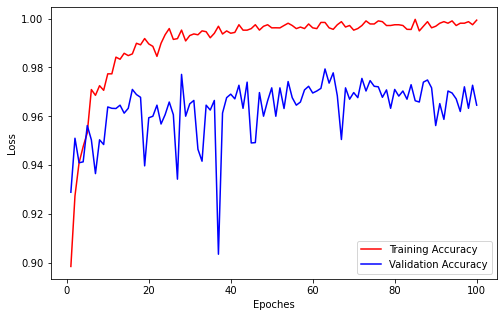

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(epoches, train_acc, 'r')
plt.plot(epoches, valdt_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

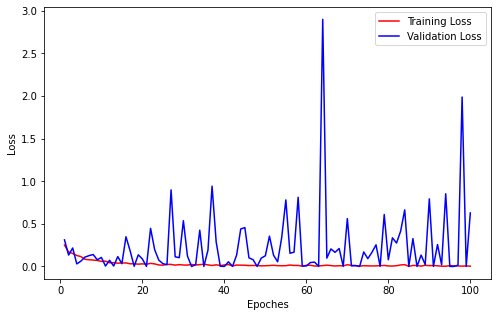

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(epoches, train_loss, 'r')
plt.plot(epoches, valdt_loss, 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

# Testing model 

In [17]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy: \t\t', test_acc)

Test accuracy: 		 0.9610000252723694
